In [1]:
# Initialize the libraries

import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
import shutil

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Helper libraries
import numpy as np



/Users/romanherrera/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/romanherrera/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/romanherrera/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/romanherrera/opt/anaconda3/lib/python3.7/s

In [2]:
# Initialize our datasets

base_dir = '/Users/romanherrera/Desktop/Computer_Vision/Project/Imgs'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cat')

# Directory with our training fake cat pictures
train_artificial_cats_dir = os.path.join(train_dir, 'artificial_cat')

# Directory with our training not-cat pictures
train_neither_dir = os.path.join(train_dir, 'neither')

# Directory with our validation real cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cat')

# Directory with our validation fake cat pictures
validation_artificial_cats_dir = os.path.join(validation_dir, 'artificial_cat')

# Directory with our validation not-cat pictures
validation_neither_dir = os.path.join(validation_dir, 'neither')

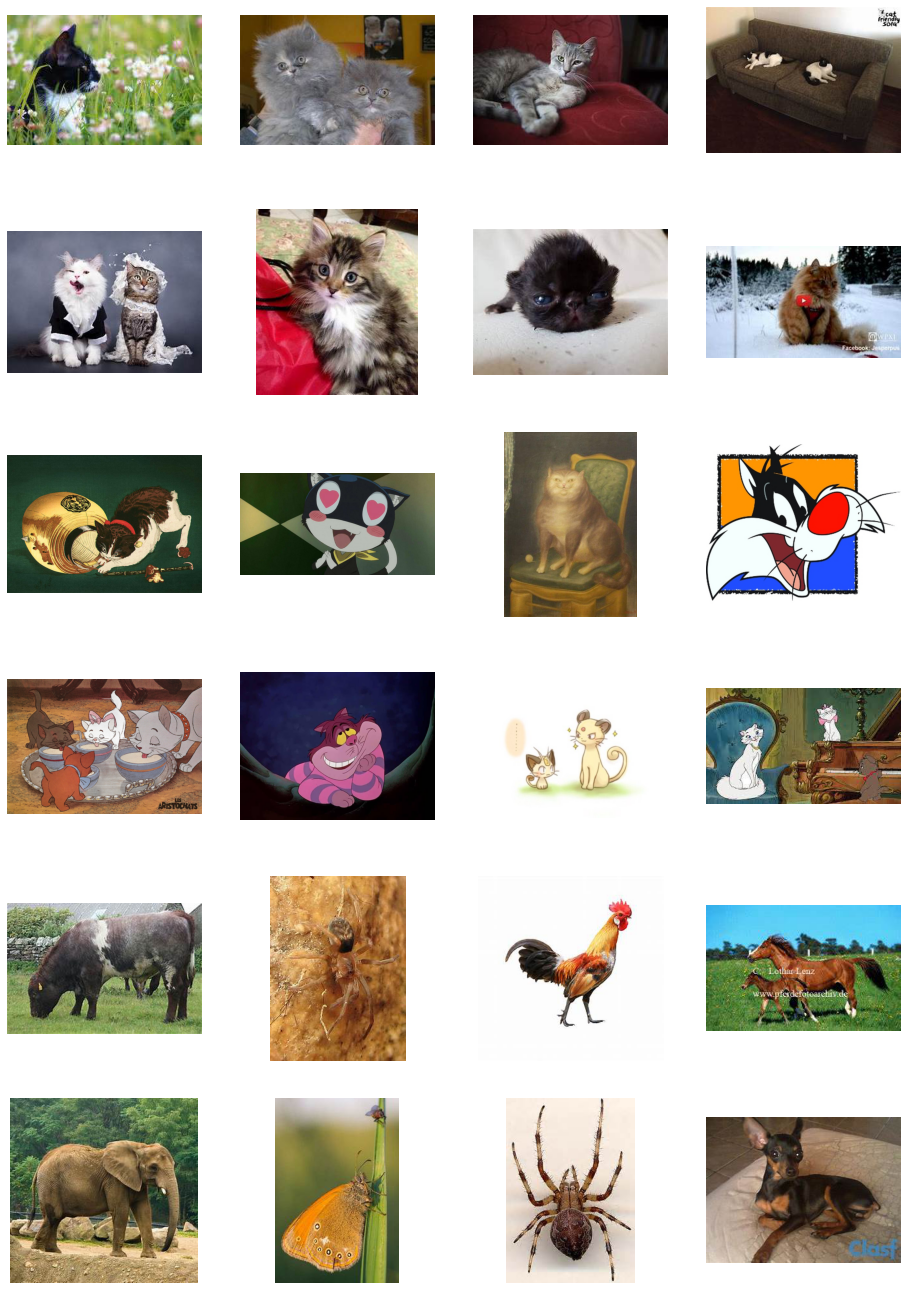

In [3]:
# Confirming the data looks correct

# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 8
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_artificial_cats_fnames = os.listdir( train_artificial_cats_dir )
train_neither_fnames = os.listdir( train_neither_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_artificial_cat_pix = [os.path.join(train_artificial_cats_dir, fname) 
                for fname in train_artificial_cats_fnames[ pic_index-8:pic_index]
               ]

next_neither_pix = [os.path.join(train_neither_dir, fname) 
                for fname in train_neither_fnames[ pic_index-8:pic_index]
               ]          

for i, img_path in enumerate(next_cat_pix+next_artificial_cat_pix+next_neither_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    try:
        img = mpimg.imread(img_path)
        plt.imshow(img)
    except:
        dest_train = "/Users/romanherrera/Desktop/Computer_Vision/Project/Imgs/training/artificial_cat/"
        source = "/Users/romanherrera/Desktop/Computer_Vision/Project/Imgs/artificial_cats/"

        shutil.move(img_path, source)

plt.show()

have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an invalid file
still movin
have an in

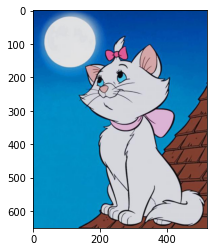

In [28]:
# Removing bad artifical cat photos. Commented out to ensure it is not run multiple times.

# all_photos = "/Users/romanherrera/Desktop/Computer_Vision/Project/Imgs/artificial_cats"
# all_fnames = os.listdir( all_photos )
# next_artificial_cat_pix = [os.path.join(all_photos, fname) 
#                 for fname in all_fnames]
# counter = 0
# for i, img_path in enumerate(next_artificial_cat_pix):
#     # Set up subplot; subplot indices start at 1
# #     sp = plt.subplot(nrows, ncols, i + 1)
# #     sp.axis('Off') # Don't show axes (or gridlines)
#     try:
#         img = mpimg.imread(img_path)
#         plt.imshow(img)
#     except:
#         print("have an invalid file")
#         dest = "/Users/romanherrera/Desktop/Computer_Vision/Project/Imgs/bad_fake_img/"
#         source = "/Users/romanherrera/Desktop/Computer_Vision/Project/Imgs/artificial_cats/"
#         try:
#             shutil.move(img_path, dest)
#             print("still movin")
#         except:
#             print("Failed to move", img_path," . Likely already exists")
#             counter+=1
# print(counter)

In [33]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [34]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'categorical', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'categorical', target_size = (150, 150))


Found 2903 images belonging to 3 classes.
Found 1898 images belonging to 3 classes.


In [35]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

In [36]:
for layer in base_model.layers:
    layer.trainable = False

In [41]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

In [42]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


/Users/romanherrera/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
146/146 [==============================] - 163s 1s/step - loss: 1.0209 - acc: 0.7265 - val_loss: 2.0668 - val_acc: 0.6844
Epoch 2/10
146/146 [==============================] - 157s 1s/step - loss: 0.5248 - acc: 0.8150 - val_loss: 0.5652 - val_acc: 0.9204
Epoch 3/10
146/146 [==============================] - 151s 1s/step - loss: 0.5273 - acc: 0.8181 - val_loss: 0.5391 - val_acc: 0.9257
Epoch 4/10
146/146 [==============================] - 146s 999ms/step - loss: 0.4795 - acc: 0.8429 - val_loss: 0.8882 - val_acc: 0.9020
Epoch 5/10
146/146 [==============================] - 145s 996ms/step - loss: 0.4982 - acc: 0.8367 - val_loss: 0.7123 - val_acc: 0.9168
Epoch 6/10
146/146 [==============================] - 140s 961ms/step - loss: 0.4542 - acc: 0.8367 - val_loss: 0.8254 - val_acc: 0.9083
Epoch 7/10
146/146 [==============================] - 152s 1s/step - loss: 0.4343 - acc: 0.8622 - val_loss: 0.7964 - val_acc: 0.9168
Epoch 8/10
146/146 [==============================] - 145s 9

In [43]:
# Save the model for later

model.save("model.h5")

In [21]:
!pip install tensorflow==1.13.1

import tensorflow.compat.v2 as tf

  Using cached tensorflow-1.13.1-cp37-cp37m-macosx_10_11_x86_64.whl (73.6 MB)
  Using cached tensorflow_estimator-1.13.0-py2.py3-none-any.whl (367 kB)
  Using cached tensorboard-1.13.1-py3-none-any.whl (3.2 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.15.3
    Uninstalling tensorflow-1.15.3:
      Successfully uninstalled tensorflow-1.15.3


ModuleNotFoundError: No module named 'tensorflow.compat.v2'

In [22]:
from tensorflow import keras
model = keras.models.load_model('model.h5')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [26]:
files

['lola.jpg',
 'IMG_6100.jpg',
 'd41341b7898631cc2f7641d028f7be79.jpg',
 'dumbo.jpeg',
 '.DS_Store',
 '61pbFP0KqaL._AC_SX466_.jpg',
 'IMG_6402.jpg',
 'apiwpjsjb__33414.1599656441.jpg',
 '17022.jpg',
 'matisse_human.jpeg',
 'elephant.jpeg',
 '480-4808171_745-sun-and-moon-dog-pokemon-hd.jpg']

In [67]:
# Predict images' classification using the model and store statistics

folders = ["artificial_cats", "real_cats", "neither"]

source_path = "/Users/romanherrera/Desktop/Computer_Vision/Project/Imgs/prediction_imgs/"
ac_tpos = 0
ac_tneg = 0
ac_fpos = 0
ac_fneg = 0

rc_tpos = 0
rc_tneg = 0
rc_fpos = 0
rc_fneg = 0

n_tpos = 0
n_tneg = 0
n_fpos = 0
n_fneg = 0

avg_confidence = 0

for folder in folders:
    source = source_path + folder + "/"
    files = os.listdir(source)

    num_files = len(files)
    for k, f in enumerate(files):
        if f == ".DS_Store":
            continue
        img_path = source_path + folder + "/" + f
#         img = mpimg.imread(img_path)
#         plt.axis("off")
#         plt.imshow(img)
#         plt.show()

        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_batch = np.expand_dims(img_array, axis=0)
        img_preprocessed = preprocess_input(img_batch)

        prediction = model.predict(img_preprocessed)
        predicted_label = folders[prediction[0].argmax()]
        if folder == predicted_label:
            if folder == "artificial_cats":
                ac_tpos += 1
                rc_tneg += 1
                n_tneg += 1
            elif folder == "real_cats":
                rc_tpos += 1
                ac_tneg += 1
                n_tneg += 1
            elif folder == "neither":
                n_tpos += 1
                ac_tneg += 1
                rc_tneg += 1
                
        elif folder == "artificial_cats":
            ac_fneg += 1
            if predicted_label == "real_cats":
                rc_fpos += 1
                n_tneg += 1
            elif predicted_label == "neither":
                n_fpos += 1
                rc_tneg += 1
                
        elif folder == "real_cats":
            rc_fneg += 1
            if predicted_label == "artificial_cats":
                ac_fpos += 1
                n_tneg += 1
            elif predicted_label == "neither":
                n_fpos += 1
                ac_tneg += 1
                
        elif folder == "neither":
            n_fneg += 1
            if predicted_label == "real_cats":
                rc_fpos += 1
                ac_tneg += 1
            elif predicted_label == "artificial_cats":
                ac_fpos += 1
                rc_tneg += 1
        
        avg_confidence += max(prediction[0])
        print("The model predicts", folders[prediction[0].argmax()], "with confidence of", max(prediction[0]), "for file", f)
        # print("The model predicts it is an artificial cat with ",prediction[0] prediction)
        # print(decode_predictions(prediction, top=3)[0])

The model predicts neither with confidence of 1.0 for file anime_cat.jpeg
The model predicts neither with confidence of 1.0 for file Japanese-illustrator-makes-hyper-realistic-cat-illustrations-that-will-probably-take-your-breath-away-5e1c1776ec0f2__880.jpeg
The model predicts neither with confidence of 0.78725475 for file cats.jpeg
The model predicts neither with confidence of 1.0 for file matisse_cat.jpeg
The model predicts neither with confidence of 1.0 for file catdog.jpeg
The model predicts neither with confidence of 1.0 for file glameow.jpg
The model predicts neither with confidence of 1.0 for file snowball-ii-u2.jpeg
The model predicts neither with confidence of 1.0 for file meowth.jpeg
The model predicts artificial_cats with confidence of 1.0 for file garfield.jpeg
The model predicts neither with confidence of 1.0 for file realistic_cat.jpeg
The model predicts neither with confidence of 1.0 for file anime_cat_2.jpeg
The model predicts neither with confidence of 1.0 for file IMG

In [76]:
# Calculate all statistics
num_files = 33

ac_accuracy = (ac_tpos + ac_tneg) / num_files
ac_precision = ac_tpos / (ac_tpos + ac_fpos)
ac_recall = ac_tpos / (ac_tpos + ac_fneg)
ac_specificity = ac_tneg / (ac_tneg + ac_fpos)

rc_accuracy = (rc_tpos + rc_tneg) / num_files
rc_precision = rc_tpos / (rc_tpos + rc_fpos)
rc_recall = rc_tpos / (rc_tpos + rc_fneg)
rc_specificity = rc_tneg / (rc_tneg + rc_fpos)

n_accuracy = (n_tpos + n_tneg) / num_files
n_precision = n_tpos / (n_tpos + n_fpos)
n_recall = n_tpos / (n_tpos + n_fneg)
n_specificity = n_tneg / (n_tneg + n_fpos)

avg_confidence /= 33

In [77]:

print("ac_tpos:", ac_tpos)
print("ac_tneg:", ac_tneg)
print("ac_fpos:", ac_fpos)
print("ac_fneg:", ac_fneg)
print("ac_accuracy:", ac_accuracy)
print("ac_precision:", ac_precision)
print("ac_recall:", ac_recall)
print("ac_specificity:", ac_specificity)

print()

print("rc_tpos:", rc_tpos)
print("rc_tneg:", rc_tneg)
print("rc_fpos:", rc_fpos)
print("rc_fneg:", rc_fneg)
print("rc_accuracy:", rc_accuracy)
print("rc_precision:", rc_precision)
print("rc_recall:", rc_recall)
print("rc_specificity:", rc_specificity)

print()

print("n_tpos:", n_tpos)
print("n_tneg:", n_tneg)
print("n_fpos:", n_fpos)
print("n_fneg:", n_fneg)
print("n_accuracy:", n_accuracy)
print("n_precision:", n_precision)
print("n_recall:", n_recall)
print("n_specificity:", n_specificity)

print()
print(avg_confidence)

ac_tpos: 1
ac_tneg: 22
ac_fpos: 0
ac_fneg: 10
ac_accuracy: 0.696969696969697
ac_precision: 1.0
ac_recall: 0.09090909090909091
ac_specificity: 1.0

rc_tpos: 5
rc_tneg: 20
rc_fpos: 2
rc_fneg: 6
rc_accuracy: 0.7575757575757576
rc_precision: 0.7142857142857143
rc_recall: 0.45454545454545453
rc_specificity: 0.9090909090909091

n_tpos: 9
n_tneg: 6
n_fpos: 16
n_fneg: 2
n_accuracy: 0.45454545454545453
n_precision: 0.36
n_recall: 0.8181818181818182
n_specificity: 0.2727272727272727

0.02955233864657259


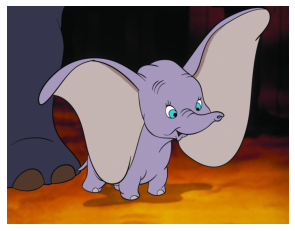

The model predicts neither with confidence of 1.0


In [75]:
# Predict a specific image classification using the model for visualization

folders = ["artificial_cats", "real_cats", "neither"]

source_path = "/Users/romanherrera/Desktop/Computer_Vision/Project/Imgs/prediction_imgs/"


img_path = source_path + folders[2] + "/" + "dumbo.jpeg"
img = mpimg.imread(img_path)
plt.axis("off")
plt.imshow(img)
plt.show()

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

prediction = model.predict(img_preprocessed)
predicted_label = folders[prediction[0].argmax()]

print("The model predicts", folders[prediction[0].argmax()], "with confidence of", max(prediction[0]))
